# Computer vision 

In [1]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml
h , w = 28, 28
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/envs/bayesian-fairness/lib/python3.9/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X.shape

(70000, 784)

# Plot image

Get a random image from the dataset and plot it using matplotlib.
Remember that after selecting an image you have to transform it into a matrix if (28,28) pixel

In [4]:
image_data = X.iloc[15].values # this is a vector we want matrix
y_example = y.iloc[15]

In [5]:
image = #

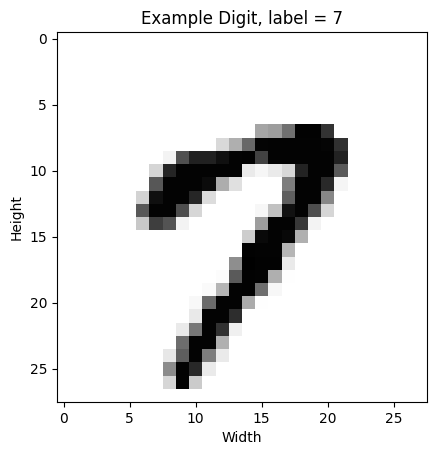

In [6]:
plt.figure()
plt.imshow(image, cmap = "Greys")
plt.title(f"Example Digit, label = {y_example}")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()
plt.close()

# Normalise data 

Normalize your data in order to scale the values from [0,1]
In order to do so think of the maximum and the minimum value of each pixel.

In [7]:
X_norm =  # convert image to value [0, 1] 
y = y.astype("int")

# Split into train val test

Split the dataset into training validation and test set using sklearn.

In [8]:
from sklearn.model_selection import train_test_split
# create train test set


In [9]:
# create train validation set


In [10]:
print("train set size: ", X_train.shape)
print("val set size: ", X_val.shape)
print("test set size: ", X_test.shape)

train set size:  (50400, 784)
val set size:  (5600, 784)
test set size:  (14000, 784)


# Convert image to pytorch dataset

Fill the following function that get a pytorch data loader from a numpy arrays.
You can check our previous pytorch lab to write the function.

In [11]:
import torch

def get_dataloader(X,y, batch_size, shuffle ):
    # fill your code
    return dataloader

We now get the loader for the different data sets.

In [13]:
train_dataloader = get_dataloader(X_train.values, y_train.values, batch_size = 16, shuffle=True)
val_dataloader = get_dataloader(X_val.values, y_val.values, batch_size = y_val.shape[0], shuffle=False)
test_dataloader = get_dataloader(X_test.values, y_test.values, batch_size = y_test.shape[0], shuffle=True)

# Softmax

Implement the softmax function.
The function in applied to a array $z$ and return a normalised array with values between $[0,1]$

The values of each element is calculated according to the following formula:

$$ \sigma(z_i) = \frac{e^{z_{i}}}{\sum_{j=1}^K e^{z_{j}}} \ \ \ for\ i=1,2,\dots,K $$

The advantage of softmax is that is we sum the result of the function always sum to one.
So is used in machine learning problem in order to convert a vector of arbitrary values into a vector of propabilities.



In [100]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    # fill your code
    return 

In [101]:
array1 = np.array([1,1,1])
softmax(array1)

array([0.33333333, 0.33333333, 0.33333333])

In [102]:
array2 = np.array([0,0,1])
softmax(array2)

array([0.21194156, 0.21194156, 0.57611688])

In [103]:
array2 = np.array([1, 2, 4, 8])
softmax(array2)

array([8.92508923e-04, 2.42609079e-03, 1.79265209e-02, 9.78754879e-01])

# Simple Model

Define a simple neural network, as our the example in introduction to pytorch.
Use 100 units for the first layer and 50 for the second layer.  
The output units must be the same as the number of classes (10).  
We also have to use softmax to transform the output in range $[0, 1]$ in order to represent propabilities as explained before.

In [1]:
class NeuralNetwork(torch.nn.Module):
    """
    Simple two layer neural network for regression
    """
    def __init__(self, num_input_features):
        super().__init__()
        
        # layer 1

        
        # layer  2

        
        # layer output layer


    def forward(self, x):

        return output

NameError: name 'torch' is not defined

In [2]:
simple_ff_model = NeuralNetwork(num_input_features = X_train.shape[1])

NameError: name 'NeuralNetwork' is not defined

# Training

In [106]:
# -------------------- Training  Step----------------------------
def training_step(model, input_data, optimizer, loss_fn):
    # reset gradients of the optimizer
    optimizer.zero_grad()
    
    # unfold data
    x_batch, y_batch = input_data
    
    # get predictions
    y_pred_propa = model(x_batch)
    
    # calculate loss
    loss = loss_fn(y_pred_propa, y_batch)

    # compute gradients 
    loss.backward()
    
    # optimise network
    optimizer.step()
    
    # compute metrics for monitoring
    with torch.no_grad(): 
        y_pred = torch.argmax(y_pred_propa,axis=1)
        
        train_acc = torch.sum(y_pred == y_batch) / y_batch.shape[0]

    return loss.data.numpy(), train_acc.data.numpy()

In [107]:
def evaluation_step(model, input_data, loss_fn):
    # when we use torch.no_grad pytorch didnt store information
    # that is required to calculate gradients so is fasterr 
    with torch.no_grad(): 
        x_batch, y_batch = input_data
        y_pred_proba = model(x_batch)
        loss = loss_fn(y_pred_proba, y_batch)

        # compute metrics
        y_pred = torch.argmax(y_pred_proba,axis=1)
        acc = torch.sum(y_pred == y_batch) / y_batch.shape[0]
    return loss.data.numpy(), acc.data.numpy()

In [108]:
import time


# -------------------- Train  Loop----------------------------
def train_loop(train_dataloader, val_dataloader, patient, epochs, model, optimizer, loss_fn):
    best_loss = np.inf
    consecutive_epoch = 0
    best_epoch = 0

    train_history = []
    val_history = []
    for epoch in range(epochs): # iterate over epoch    

        # -------------------- Training on each epoch ----------------------------
        total_step = len(train_dataloader)
        accumulated_loss = 0 # monitor loss during training
        accumulated_accuracy = 0 # monitor  accuracy during training
        accuracy_list = []
        start = time.time()
        for step in range(total_step): # iterate over batch
            batch_data = next(iter(train_dataloader)) # get a batch
            loss, accuracy = training_step(model,batch_data,optimizer,loss_fn) # train model using a single batch
            accuracy_list += [accuracy]
            accumulated_loss = (step * accumulated_loss + loss)/(step+1)
            accumulated_accuracy =  (step * accumulated_accuracy + accuracy)/(step+1)
        end = time.time()
        total_time = end - start
        train_history += [{"loss":accumulated_loss, "accuracy":accumulated_accuracy, "epoch": epoch, "set":"train"}]

        # -------------------- Monitor Error Validation set ----------------------------
        val_data = next(iter(val_dataloader))
        val_loss, val_accuracy = evaluation_step(model, val_data, loss_fn)
        val_history += [{"loss":val_loss, "accuracy":val_accuracy, "epoch": epoch, "set":"val"}]
        if epoch % 1 == 0:
            print(f"Epoch {epoch}/{epochs}:({total_time:.3f} sec)  loss:{accumulated_loss:.3f}, accuracy-:{accumulated_accuracy:.3f}, val_loss:{val_loss:.3f}, val_accuracy->{val_accuracy:.3f}")

        # -------------------- Early Stoping ----------------------------
        if val_loss > best_loss:
            consecutive_epoch += 1
        else:
            best_loss = val_loss # we have an improvement
            consecutive_epoch = 0 # reset counter
            best_epoch = epoch
            best_weights = model.state_dict()

        if consecutive_epoch > patient:
            break
    val_history_df = pd.DataFrame(val_history)
    train_history_df = pd.DataFrame(train_history)
    return model, val_history_df, train_history_df, best_loss, best_epoch, best_weights

In [109]:
import pandas as pd

In [20]:
lr = 0.001

optimizer = torch.optim.Adam(simple_ff_model.parameters(), lr=lr)
loss_fn = torch.nn.CrossEntropyLoss() # cross entropy

out = train_loop(train_dataloader = train_dataloader,
                 val_dataloader = val_dataloader,
                 patient = 3, 
                 epochs = 10,
                 model = simple_ff_model,
                 optimizer= optimizer,
                 loss_fn= loss_fn)

model, val_history_es_5, train_history_es_5, best_loss, best_epoch, best_weights = out

/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/envs/bayesian-fairness/lib/python3.9/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch 0/10:(5.312 sec)  loss:1.673, accuracy-:0.796, val_loss:1.621, val_accuracy->0.841
Epoch 1/10:(5.187 sec)  loss:1.559, accuracy-:0.904, val_loss:1.529, val_accuracy->0.933
Epoch 2/10:(5.171 sec)  loss:1.506, accuracy-:0.957, val_loss:1.518, val_accuracy->0.946
Epoch 3/10:(5.188 sec)  loss:1.497, accuracy-:0.965, val_loss:1.509, val_accuracy->0.952
Epoch 4/10:(5.107 sec)  loss:1.493, accuracy-:0.969, val_loss:1.504, val_accuracy->0.959
Epoch 5/10:(5.202 sec)  loss:1.488, accuracy-:0.974, val_loss:1.499, val_accuracy->0.962
Epoch 6/10:(5.265 sec)  loss:1.486, accuracy-:0.975, val_loss:1.501, val_accuracy->0.961
Epoch 7/10:(5.266 sec)  loss:1.485, accuracy-:0.976, val_loss:1.500, val_accuracy->0.961
Epoch 8/10:(5.207 sec)  loss:1.484, accuracy-:0.977, val_loss:1.498, val_accuracy->0.964
Epoch 9/10:(5.097 sec)  loss:1.482, accuracy-:0.979, val_loss:1.502, val_accuracy->0.960


In [21]:
test_data = next(iter(test_dataloader))
loss, acc = evaluation_step(simple_ff_model, test_data, loss_fn)

/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/envs/bayesian-fairness/lib/python3.9/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [22]:
loss, acc

(array(1.5008513, dtype=float32), array(0.96021426, dtype=float32))

# cnn model

Define a cnn architecture, with two cnn layers using 16 and 32 kernels respectively.
Each kernel on both layers in has a size 5x5.
After each layer we apply Relu activation function and max-pooling with kernel size 2 and stride 2.

At the end you add a simple linear layer on the flatten representation of the final cnn architecture.

Check the supplementary slide to calculate the correct input shape for you layers, otherwise you will get an error. (final slides)

Fill the code bellow.

In [80]:
class CnnNeuralNetwork(torch.nn.Module):
    """
    Simple two layer neural network for regression
    """
    def __init__(self, num_of_channels):
        super().__init__()
        
        # layer 1
        self.cnn_layer_1 = torch.nn.Conv2d(in_channels=,    # input channels           
                                           out_channels=,   # number of kernels
                                           kernel_size=  # kenrel size 
                                          )
        self.activation_1 = # relu
        self.polling_1 = torch.nn.MaxPool2d(kernel_size=) # maxpolling
        
        # layer  2
        self.cnn_layer_2 = torch.nn.Conv2d(
                                          in_channels=,  # input channels           
                                          out_channels=, # number of kernels        
                                          kernel_size= # kenrel size 
                                          )
        self.activation_2 =  # relu
        self.polling_2 = torch.nn.MaxPool2d() # maxpolling
        
        # layer output layer
        self.out_layer = torch.nn.Linear(in_features=, # inputs that depends on the output of the cnn
                                         out_features=)
        self.out_activation= torch.nn.Softmax()

    def forward(self, x):
        # construct the forward pass
        x_1 = self.polling_1(self.activation_1( self.cnn_layer_1( x ) ))
        x_2 = self.polling_2(self.activation_2( self.cnn_layer_2( x_1 ) ))
        
        flaten = torch.flatten(x_2,start_dim=1)
        
        output = self.out_activation(self.out_layer(flaten))
        return output 

In [81]:
cnn_model = CnnNeuralNetwork(num_of_channels = 1)

In [4]:
cnn_model

NameError: name 'cnn_model' is not defined

# Create data loader for the cnn model

The cnn model takes as input a batch of images of (28,28) shape.
In pytorch use the first dimension of the input as the channel information, so it receives input batches of shape: (batch_size, Channels, H, W)
Call the get_dataloader with the right arguments in order to produce the input in the correct format

In [82]:
train_dataloader = get_dataloader(# add corect argument,
                                  y_train.values,
                                  batch_size = 16,
                                  shuffle=True)

val_dataloader = get_dataloader(# add corect argument,
                                y_val.values,
                                batch_size = y_val.shape[0],
                                shuffle=False)

test_dataloader = get_dataloader(# add corect argument,
                                 y_test.values,
                                 batch_size = y_test.shape[0],
                                 shuffle=True)

In [83]:
lr = 0.001

optimizer = torch.optim.Adam(cnn_model.parameters(), lr=lr)
loss_fn = torch.nn.CrossEntropyLoss() # binary cross entropy

out = train_loop(train_dataloader = train_dataloader,
                 val_dataloader = val_dataloader,
                 patient = 3, 
                 epochs = 15,
                 model = cnn_model,
                 optimizer= optimizer,
                 loss_fn= loss_fn)

model, val_history_es_5, train_history_es_5, best_loss, best_epoch, best_weights = out

Epoch 0/15:(13.262 sec)  loss:1.592, accuracy-:0.872, val_loss:1.492, val_accuracy->0.970
Epoch 1/15:(13.120 sec)  loss:1.485, accuracy-:0.977, val_loss:1.488, val_accuracy->0.975
Epoch 2/15:(13.136 sec)  loss:1.480, accuracy-:0.982, val_loss:1.492, val_accuracy->0.971
Epoch 3/15:(12.994 sec)  loss:1.477, accuracy-:0.985, val_loss:1.481, val_accuracy->0.980
Epoch 4/15:(12.980 sec)  loss:1.475, accuracy-:0.987, val_loss:1.479, val_accuracy->0.982
Epoch 5/15:(13.429 sec)  loss:1.474, accuracy-:0.987, val_loss:1.478, val_accuracy->0.983
Epoch 6/15:(13.001 sec)  loss:1.472, accuracy-:0.989, val_loss:1.480, val_accuracy->0.981
Epoch 7/15:(13.318 sec)  loss:1.471, accuracy-:0.990, val_loss:1.478, val_accuracy->0.983
Epoch 8/15:(13.117 sec)  loss:1.470, accuracy-:0.991, val_loss:1.474, val_accuracy->0.988
Epoch 9/15:(12.985 sec)  loss:1.470, accuracy-:0.991, val_loss:1.479, val_accuracy->0.982
Epoch 10/15:(13.033 sec)  loss:1.470, accuracy-:0.991, val_loss:1.475, val_accuracy->0.986
Epoch 11/

In [ ]:
test_data = next(iter(test_dataloader))
loss, acc = evaluation_step(cnn_model, test_data, loss_fn)

In [ ]:
loss, acc